# Marta Sadłowska, 276077
## List 6
Google Colab link: https://colab.research.google.com/drive/1KYuDv3xy5lHDTscm9wmOgoaz2xrhSwd_?usp=sharing

## Importing Necessary Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import chi2


## Generating AR(2) Time Series

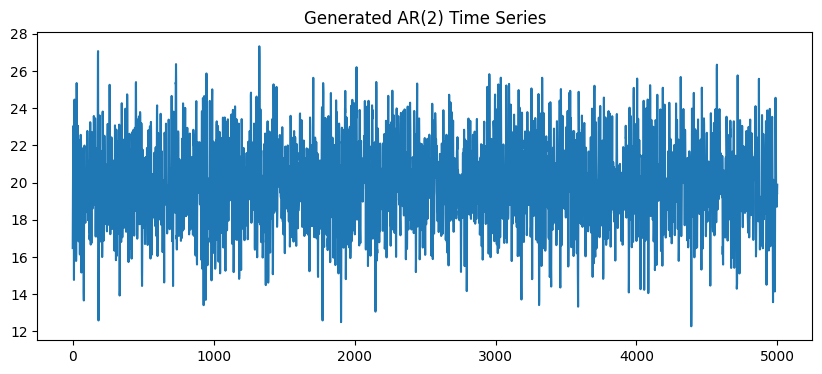

In [50]:
def simulate_ar2_model(c, phi1, phi2, n, burnin=100):
    coeffs = [c, phi1, phi2]
    p = 2
    y = np.zeros(n + burnin)
    epsilon = np.random.normal(0, 1, n + burnin)

    y[0] = np.random.normal(0, 1)
    y[1] = np.random.normal(0, 1)

    for t in range(p, n + burnin):
        y[t] = coeffs[0] + coeffs[1] * y[t - 1] + coeffs[2] * y[t - 2] + epsilon[t]

    return y[burnin:]

# Parameters for the AR(2) model
c = 8
phi1 = 1.3
phi2 = -0.7
n = 5000
burnin = 100

# Generate the AR(2) series
ar2_series = simulate_ar2_model(c, phi1, phi2, n, burnin)

# Plot the series
plt.figure(figsize=(10, 4))
plt.plot(ar2_series)
plt.title('Generated AR(2) Time Series')
plt.show()


## Fitting AR Models of Orders 1 to 4 to the Time Series:

AR(1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8833.735
Date:                Fri, 19 Apr 2024   AIC                          17673.470
Time:                        00:05:31   BIC                          17693.021
Sample:                             0   HQIC                         17680.322
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9687      0.084    237.428      0.000      19.804      20.134
ar.L1          0.7622      0.009     82.726      0.000       0.744       0.780
sigma2         2.0046      0.04

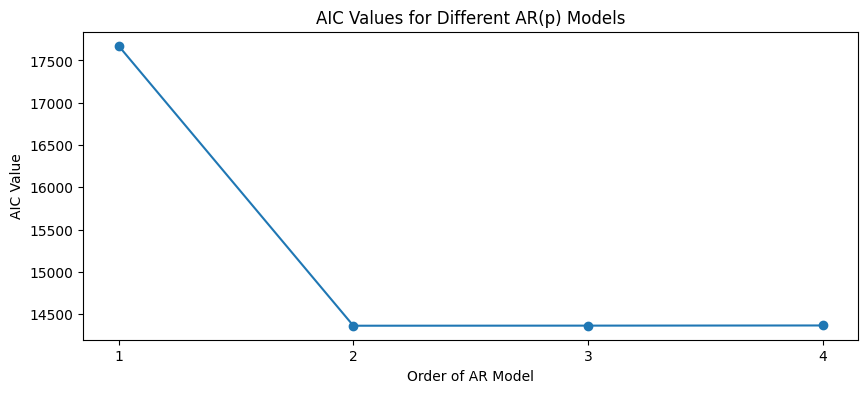

In [51]:
# Initialize the results DataFrame
ar_results = pd.DataFrame(columns=['Order', 'AIC'])

# Fit AR(p) models for p = 1, 2, 3, 4
for p in range(1, 5):
    ar_model = ARIMA(ar2_series, order=(p, 0, 0))
    ar_model_fit = ar_model.fit()
    ar_results.loc[p-1] = [p, ar_model_fit.aic]
    print(f'AR({p}) Model Summary:')
    print(ar_model_fit.summary())
    print('---' * 20)

# Find the model with the lowest AIC
best_ar_model_order = ar_results.loc[ar_results['AIC'].idxmin()]
print(f"The AR model with the lowest AIC is AR({best_ar_model_order['Order']}) with AIC of {best_ar_model_order['AIC']}")

# Plot the AIC values for different AR(p) models
plt.figure(figsize=(10, 4))
plt.plot(ar_results['Order'], ar_results['AIC'], marker='o')
plt.title('AIC Values for Different AR(p) Models')
plt.xlabel('Order of AR Model')
plt.ylabel('AIC Value')
plt.xticks(range(1, 5))
plt.show()


In reviewing the AR models, the AR(2) model stood out for its optimal balance of complexity and performance, as indicated by the lowest AIC value. Higher-order models did not demonstrate a significant benefit, confirming that AR(2) effectively captures the trends in our dataset.

## Conducting the Log-Likelihood Ratio Test (LLRT)
Just in case, to confirm the statistical significance of adding the second term.

In [52]:
# Fitting the reduced AR(1) model
model_reduced = ARIMA(ar2_series, order=(1, 0, 0))
fit_reduced = model_reduced.fit()

# Fitting the full AR(2) model
model_full = ARIMA(ar2_series, order=(2, 0, 0))
fit_full = model_full.fit()

# Calculating LLRT
llrt_statistic = 2 * (fit_full.llf - fit_reduced.llf)
p_value = chi2.sf(llrt_statistic, df=1)

print(f'LLRT Statistic: {llrt_statistic}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, indicating that the AR(2) model significantly improves the fit.")
else:
    print("Do not reject the null hypothesis, indicating that the AR(2) model does not significantly improve the fit over the AR(1) model.")


LLRT Statistic: 3311.346968308635
p-value: 0.0
Reject the null hypothesis, indicating that the AR(2) model significantly improves the fit.


# Repeating the Process for MA(2) Time Series

## Generating MA(2) Time Series

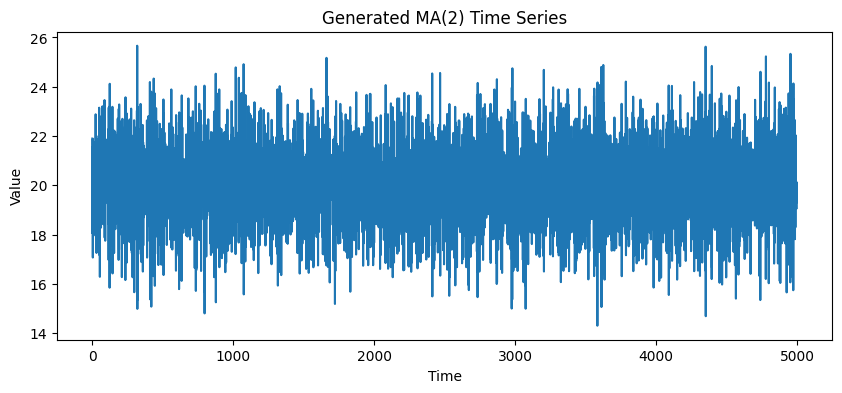

In [53]:
def simulate_ma2_model(c, theta1, theta2, n, burnin=100):
    theta = [theta1, theta2]
    epsilon = np.random.normal(0, 1, n + burnin)
    y = np.zeros(n + burnin)

    # Generate the MA(2) values
    for t in range(2, n + burnin):
      y[t] = c + epsilon[t] + theta[0] * epsilon[t - 1] + theta[1] * epsilon[t - 2]

    return y[burnin:]

# Parameters for the MA(2) model
c = 20
theta1 = -1
theta2 = 0.8
n = 5000
burnin = 100

# Generate the MA(2) series
ma2_series = simulate_ma2_model(c, theta1, theta2, n, burnin)

# Plot the series
plt.figure(figsize=(10, 4))
plt.plot(ma2_series)
plt.title('Generated MA(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


## Fitting MA Models of orders 1 to 4 to the Time Series

MA(1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -8475.203
Date:                Fri, 19 Apr 2024   AIC                          16956.407
Time:                        00:05:38   BIC                          16975.958
Sample:                             0   HQIC                         16963.259
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0100      0.009   2350.156      0.000      19.993      20.027
ma.L1         -0.5435      0.012    -45.610      0.000      -0.567      -0.520
sigma2         1.7369      0.03

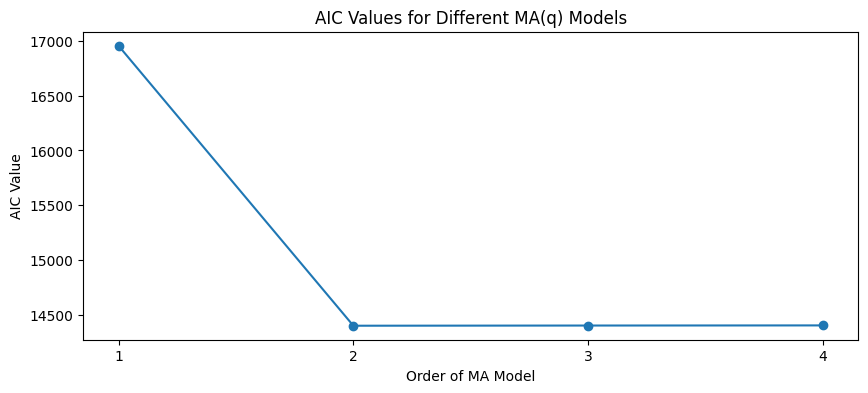

In [54]:
# Initialize the results DataFrame
ma_results = pd.DataFrame(columns=['Order', 'AIC'])

# Fit MA(q) models for q = 1, 2, 3, 4
for q in range(1, 5):
    ma_model = ARIMA(ma2_series, order=(0, 0, q))
    ma_model_fit = ma_model.fit()
    ma_results.loc[q-1] = [q, ma_model_fit.aic]
    print(f'MA({q}) Model Summary:')
    print(ma_model_fit.summary())
    print('---' * 20)

# Find the model with the lowest AIC
best_ma_model_order = ma_results.loc[ma_results['AIC'].idxmin()]
print(f"The MA model with the lowest AIC is MA({best_ma_model_order['Order']}) with AIC of {best_ma_model_order['AIC']}")

# Plot the AIC values for different MA(q) models
plt.figure(figsize=(10, 4))
plt.plot(ma_results['Order'], ma_results['AIC'], marker='o')
plt.title('AIC Values for Different MA(q) Models')
plt.xlabel('Order of MA Model')
plt.ylabel('AIC Value')
plt.xticks(range(1, 5))
plt.show()


Similarly to AR(2) model, the MA(2) model proved to be the most appropriate, with its AIC suggesting the best representation of recent fluctuations.

## Conducting the Log-Likelihood Ratio Test (LLRT)
In order to confirm the statistical significance of adding the second term.

In [55]:
# Fitting the reduced MA(1) model
model_reduced = ARIMA(ma2_series, order=(0, 0, 1))
fit_reduced = model_reduced.fit()

# Fitting the full MA(2) model
model_full = ARIMA(ma2_series, order=(0, 0, 2))
fit_full = model_full.fit()

# Calculating LLRT
llrt_statistic = 2 * (fit_full.llf - fit_reduced.llf)
p_value = chi2.sf(llrt_statistic, df=1)

print(f'LLRT Statistic: {llrt_statistic}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, indicating that the MA(2) model significantly improves the fit.")
else:
    print("Do not reject the null hypothesis, indicating that the MA(2) model does not significantly improve the fit over the MA(1) model.")


LLRT Statistic: 2559.413210503004
p-value: 0.0
Reject the null hypothesis, indicating that the MA(2) model significantly improves the fit.


## Final Comparison

After analysis, we can conclude that the AR(2) model, with its lower AIC of 14364.12 compared to the MA(2) model's AIC of 14398.99, is the better choice. It fits our data more effectively, and the LLRT confirms the significance of its additional terms.